In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from os import listdir, makedirs
import os

import glob

from keras import layers
from keras import models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, regularizers

Using TensorFlow backend.


In [2]:
resolution = 150
batch_size = 128
learning_rate = 0.001
epochs = 50
history_set = {}

### CNN

In [3]:
def plotar(history,epochs,eta):
    print('Epochs: {} | Learning rate: {}'.format(epochs,eta))
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend(loc='best')

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc='best')
    plt.show()

### Item e)

In [4]:
def create_model(train_gen, val_gen, learning_rate, num_epochs, batch_size):
    path = "../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
    inception = InceptionV3(include_top=False, input_shape=(150, 150, 3), weights=path)
    
    model = Sequential()
    model.add(inception)
    model.add(layers.Flatten())
    model.add(layers.Dense(units= 64, activation='relu'))
    model.add(layers.Dense(units=10, activation='relu'))
    
    model.summary()
    
    n_train = train_gen.n
    n_valid = val_gen.n
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adamax(lr=learning_rate), metrics=['acc'])
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=n_train//batch_size,
        epochs=num_epochs,
        validation_data=val_generator,
        validation_steps=n_valid//batch_size
    )
    
    history_set[(num_epochs,learning_rate)] = history

In [5]:
top10 = {'homer_simpson': 0,
'ned_flanders': 1,
'moe_szyslak': 2,
'lisa_simpson': 3,
'bart_simpson': 4,
'marge_simpson': 5,
'krusty_the_clown': 6,
'principal_skinner': 7,
'charles_montgomery_burns': 8,
'milhouse_van_houten': 9}

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = train_datagen.flow_from_directory(
        "../input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/",
        classes = top10,
        target_size=(resolution, resolution),
        batch_size=16,
        class_mode='categorical', subset="training")

val_generator = val_datagen.flow_from_directory(
        "../input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/",
        classes = top10,
        target_size=(resolution, resolution),
        batch_size=16,
        class_mode='categorical', subset="validation")

Found 11745 images belonging to 10 classes.
Found 2066 images belonging to 10 classes.


In [8]:
create_model(train_generator,val_generator,learning_rate,epochs,batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 22,983,146
Trainable params: 22,948,714
Non-trainable params: 34,432
_________________________________________________________________
Epoch 1/50
91/91 [==============================] - 45s 490ms/step - loss: 6.3563 - acc: 0.2459 - val_loss: 5.9419 - val_acc: 0.3008
Epoch 2/50
91/91 [==============================] - 24s 269ms/step - loss: 4.3683 - acc: 0.3352 - val_loss: 4.2837 - val_acc

Epochs: 50 | Learning rate: 0.001


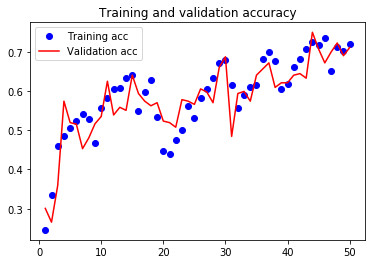

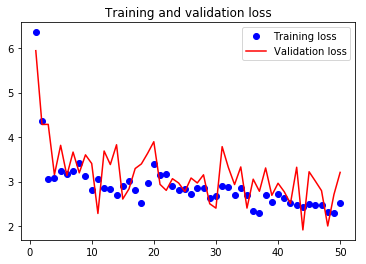

In [10]:
plotar(history_set[(50, 0.001)],50,0.001)

In [11]:
def create_model_dropout_regularizer(train_gen, val_gen, learning_rate, num_epochs, batch_size):
    path = "../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
    inception = InceptionV3(include_top=False, input_shape=(150, 150, 3), weights=path)
    
    model = Sequential()
    model.add(inception)
    model.add(layers.Flatten())
    model.add(Dropout(0.5))
    model.add(layers.Dense(units= 64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
    model.add(layers.Dense(units=10, activation='relu'))
    
    model.summary()
    
    n_train = train_gen.n
    n_valid = val_gen.n
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adamax(lr=learning_rate), metrics=['acc'])
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=n_train//batch_size,
        epochs=num_epochs,
        validation_data=val_generator,
        validation_steps=n_valid//batch_size
    )
    
    history_set[(num_epochs,learning_rate,0.5)] = history

In [12]:
create_model_dropout_regularizer(train_generator,val_generator,learning_rate,epochs,batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 22,983,146
Trainable params: 22,948,714
Non-trainable params: 34,432
_________________________________________________________________
Epoch 1/50
91/91 [==============================] - 48s 531ms/step - loss: 11.5903 - acc: 0.1724 - val_loss: 9.9816 - val_acc

Epochs: 50 | Learning rate: 0.001


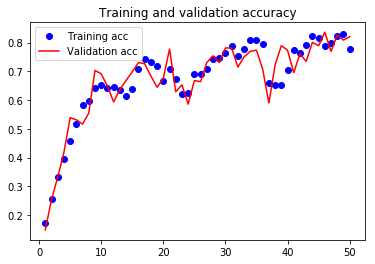

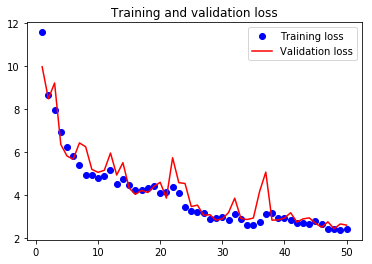

In [13]:
plotar(history_set[(50, 0.001, 0.5)],50,0.001)